In [1]:
import pandas as pd
import numpy as np

<h1>Breast cancer detection</h1>

In [2]:
url="https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/breast-cancer.csv"
df = pd.read_csv(url)
df.sample(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
25,852631,M,17.140,16.40,116.00,912.7,0.11860,0.22760,0.222900,0.140100,...,22.250,21.40,152.40,1461.0,0.1545,0.39490,0.38530,0.25500,0.4066,0.10590
381,901836,B,11.040,14.93,70.67,372.7,0.07987,0.07079,0.035460,0.020740,...,12.090,20.83,79.73,447.1,0.1095,0.19820,0.15530,0.06754,0.3202,0.07287
538,921092,B,7.729,25.49,47.98,178.8,0.08098,0.04878,0.000000,0.000000,...,9.077,30.92,57.17,248.0,0.1256,0.08340,0.00000,0.00000,0.3058,0.09938
83,8611792,M,19.100,26.29,129.10,1132.0,0.12150,0.17910,0.193700,0.146900,...,20.330,32.72,141.30,1298.0,0.1392,0.28170,0.24320,0.18410,0.2311,0.09203
522,91789,B,11.260,19.83,71.30,388.1,0.08511,0.04413,0.005067,0.005664,...,11.930,26.43,76.38,435.9,0.1108,0.07723,0.02533,0.02832,0.2557,0.07613
188,874662,B,11.810,17.39,75.27,428.9,0.10070,0.05562,0.023530,0.015530,...,12.570,26.48,79.57,489.5,0.1356,0.10000,0.08803,0.04306,0.3200,0.06576
98,862485,B,11.600,12.84,74.34,412.6,0.08983,0.07525,0.041960,0.033500,...,13.060,17.16,82.96,512.5,0.1431,0.18510,0.19220,0.08449,0.2772,0.08756
505,915276,B,9.676,13.14,64.12,272.5,0.12550,0.22040,0.118800,0.070380,...,10.600,18.04,69.47,328.1,0.2006,0.36630,0.29130,0.10750,0.2848,0.13640
108,86355,M,22.270,19.67,152.80,1509.0,0.13260,0.27680,0.426400,0.182300,...,28.400,28.01,206.80,2360.0,0.1701,0.69970,0.96080,0.29100,0.4055,0.09789
126,866083,M,13.610,24.69,87.76,572.6,0.09258,0.07862,0.052850,0.030850,...,16.890,35.64,113.20,848.7,0.1471,0.28840,0.37960,0.13290,0.3470,0.07900


The dataset includes breast tumor information. The diagnosis column means that the tumor is cancerous (M - malignant) or non-cancerous (B - benign).

In [3]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

We change these values to 0 and 1. M->1, B->0

In [4]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df['diagnosis'] = labelencoder.fit_transform(df['diagnosis'].values)
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

We randomly extract 212 rows with values equal to 0 in the Diagnosis column.

In [5]:
df_0_212 = df[df['diagnosis'] == 0].sample(212)
df_1 = df[df['diagnosis'] == 1]
df_norm = pd.concat([df_0_212, df_1]) 
df_norm['diagnosis'].value_counts()

0    212
1    212
Name: diagnosis, dtype: int64

<h3>Drop the ID column</h3>

In [6]:
df_norm.drop(columns = ["id"], inplace=True)

<h3>Correlation</h3>

In [7]:
corr_matrix = df_norm.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.709081,0.441674,0.722293,0.675911,0.380072,0.595866,0.679465,0.759415,0.340358,0.003869,0.536465,0.028015,0.530713,0.506997,0.055007,0.303681,0.246522,0.407578,0.003287,0.090732,0.752825,0.468857,0.760500,0.697922,0.444558,0.575505,0.652108,0.789940,0.400449,0.324054
radius_mean,0.709081,1.000000,0.344661,0.997723,0.987574,0.174566,0.498289,0.668312,0.819160,0.140160,0.311191,0.689579,0.096658,0.685530,0.734086,0.167615,0.223017,0.189400,0.378992,0.082944,0.029816,0.966030,0.292571,0.961444,0.938167,0.120600,0.375518,0.499834,0.728575,0.117272,0.019876
texture_mean,0.441674,0.344661,1.000000,0.352564,0.335396,0.040791,0.276813,0.327755,0.330548,0.107294,0.037110,0.281713,0.353067,0.293394,0.260860,0.032338,0.220875,0.148813,0.194962,0.018697,0.083210,0.373635,0.901641,0.381623,0.358432,0.125286,0.297638,0.322560,0.325420,0.120517,0.144900
perimeter_mean,0.722293,0.997723,0.352564,1.000000,0.986291,0.214799,0.550790,0.708980,0.848950,0.180246,0.259308,0.701972,0.084429,0.704198,0.743033,0.148595,0.268137,0.222011,0.409405,0.058179,0.007399,0.965702,0.300554,0.966858,0.938000,0.153935,0.419375,0.538289,0.757146,0.145575,0.024883
area_mean,0.675911,0.987574,0.335396,0.986291,1.000000,0.177009,0.485102,0.673434,0.815232,0.139292,0.287353,0.739331,0.066219,0.734642,0.796852,0.120319,0.222354,0.201014,0.369772,0.053804,0.010103,0.957742,0.276213,0.953864,0.954541,0.115591,0.347603,0.481382,0.701146,0.094006,0.027792
smoothness_mean,0.380072,0.174566,0.040791,0.214799,0.177009,1.000000,0.692667,0.572843,0.576481,0.575253,0.618975,0.300467,0.095177,0.296723,0.246862,0.329008,0.366879,0.280655,0.383944,0.220986,0.331838,0.217699,0.100139,0.246932,0.206177,0.808509,0.509033,0.484074,0.533725,0.406151,0.535897
compactness_mean,0.595866,0.498289,0.276813,0.550790,0.485102,0.692667,1.000000,0.883767,0.834411,0.650893,0.573853,0.489061,0.059621,0.537293,0.441593,0.129520,0.742184,0.542564,0.626070,0.263438,0.504732,0.527065,0.276919,0.584534,0.495255,0.587976,0.862040,0.817388,0.824732,0.529423,0.677307
concavity_mean,0.679465,0.668312,0.327755,0.708980,0.673434,0.572843,0.883767,1.000000,0.923875,0.546431,0.358556,0.628120,0.080876,0.651915,0.604210,0.128346,0.677910,0.681270,0.675084,0.214699,0.469098,0.675926,0.304332,0.718856,0.658934,0.478476,0.733459,0.876152,0.859706,0.411298,0.500465
concave points_mean,0.759415,0.819160,0.330548,0.848950,0.815232,0.576481,0.834411,0.923875,1.000000,0.484500,0.182363,0.694207,0.029136,0.707486,0.676532,0.050814,0.511758,0.435179,0.607779,0.123840,0.278733,0.822941,0.307142,0.850641,0.797167,0.459593,0.648185,0.744891,0.905668,0.358312,0.354803
symmetry_mean,0.340358,0.140160,0.107294,0.180246,0.139292,0.575253,0.650893,0.546431,0.484500,1.000000,0.531776,0.275679,0.137669,0.294087,0.205726,0.181170,0.478251,0.387037,0.423230,0.467128,0.375471,0.175779,0.117462,0.215414,0.163369,0.442878,0.515659,0.482371,0.467133,0.710292,0.479657


In [8]:
df_norm.corrwith(df_norm['diagnosis']).abs().sort_values(ascending=False)

diagnosis                  1.000000
concave points_worst       0.789940
perimeter_worst            0.760500
concave points_mean        0.759415
radius_worst               0.752825
perimeter_mean             0.722293
radius_mean                0.709081
area_worst                 0.697922
concavity_mean             0.679465
area_mean                  0.675911
concavity_worst            0.652108
compactness_mean           0.595866
compactness_worst          0.575505
radius_se                  0.536465
perimeter_se               0.530713
area_se                    0.506997
texture_worst              0.468857
smoothness_worst           0.444558
texture_mean               0.441674
concave points_se          0.407578
symmetry_worst             0.400449
smoothness_mean            0.380072
symmetry_mean              0.340358
fractal_dimension_worst    0.324054
compactness_se             0.303681
concavity_se               0.246522
fractal_dimension_se       0.090732
smoothness_se              0

<h4>As you can see from this object, we discard the columns whose correlation with the diagnosis column is less than 0.4.</h4>

In [9]:
cols = ['diagnosis', 'symmetry_se', 'texture_se', 'fractal_dimension_mean', 'smoothness_se', 'fractal_dimension_worst', 'smoothness_mean',
        'fractal_dimension_se', 'fractal_dimension_se', 'compactness_se', 'symmetry_mean', 'concavity_se', 'fractal_dimension_worst', 'symmetry_worst',
       ]
X = df_norm.drop(cols, axis=1).values
y = df_norm['diagnosis']

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

<h4>Machine Learning</h4>

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [12]:
y_predict = knn.predict(X_test)

<h2>Evaluation</h2>
<h4>Jaccard index</h4>

In [13]:
from sklearn.metrics import jaccard_score

jaccard_score(y_test, y_predict)

0.9361702127659575

<h4>Confusion matrix</h4>

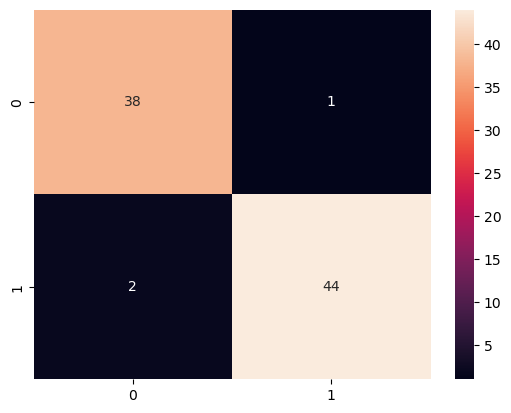

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

In [15]:
confusion_matrix(y_test, y_predict)

array([[38,  1],
       [ 2, 44]])

<h4>Precision, recall, F1</h4>

In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print(f"precision={precision}\nrecall={recall}\nf1={f1}\naccuracy={accuracy}")

precision=0.9777777777777777
recall=0.9565217391304348
f1=0.967032967032967
accuracy=0.9647058823529412


In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        39
           1       0.98      0.96      0.97        46

    accuracy                           0.96        85
   macro avg       0.96      0.97      0.96        85
weighted avg       0.97      0.96      0.96        85



<h3>Cross-validation</h3>

In [18]:
# Cross validation
from sklearn.model_selection import cross_val_predict
predict = cross_val_predict(estimator = knn, X = X, y = y, cv = 5)

from sklearn.metrics import classification_report
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       212
           1       0.97      0.95      0.96       212

    accuracy                           0.96       424
   macro avg       0.96      0.96      0.96       424
weighted avg       0.96      0.96      0.96       424



<h2>Finding the best k</h2>
<h4>Using for</h4>

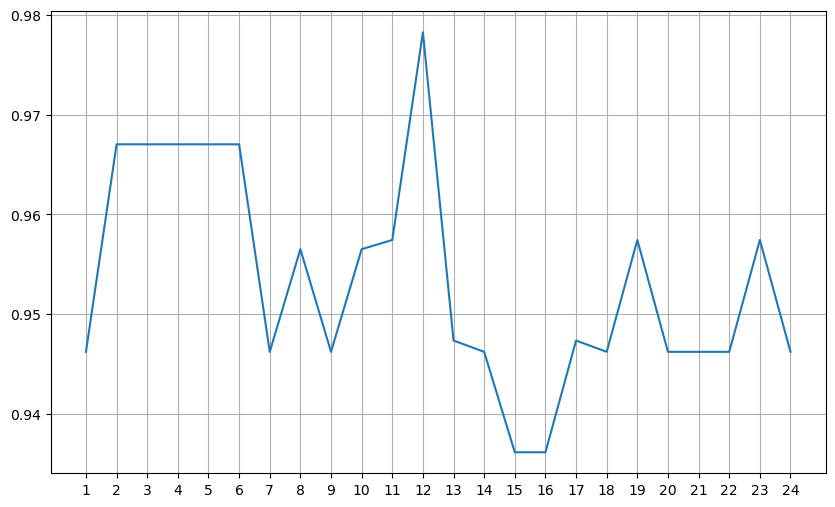

In [19]:
f1 = []
for k in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=k) # k-ni qiymati
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    f1.append(f1_score(y_test, y_predict))

plt.figure(figsize=(10,6))
plt.plot(range(1,25),f1)
plt.xticks(range(1,25))
plt.grid()
plt.show()

<h4>Grid Search</h4>

In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 25)}

knn_gscv = GridSearchCV(knn, param_grid, cv=5)

knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=24),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [21]:
knn_gscv.cv_results_['rank_test_score']

array([ 9, 16,  2,  6,  1,  7,  4, 11,  3,  4, 10, 11, 11, 22, 11,  8, 16,
       16, 16, 22, 22, 16, 16, 15], dtype=int32)

In [22]:
knn_gscv.best_params_

{'n_neighbors': 5}

In [23]:
knn_gscv.best_score_

0.9575910364145658

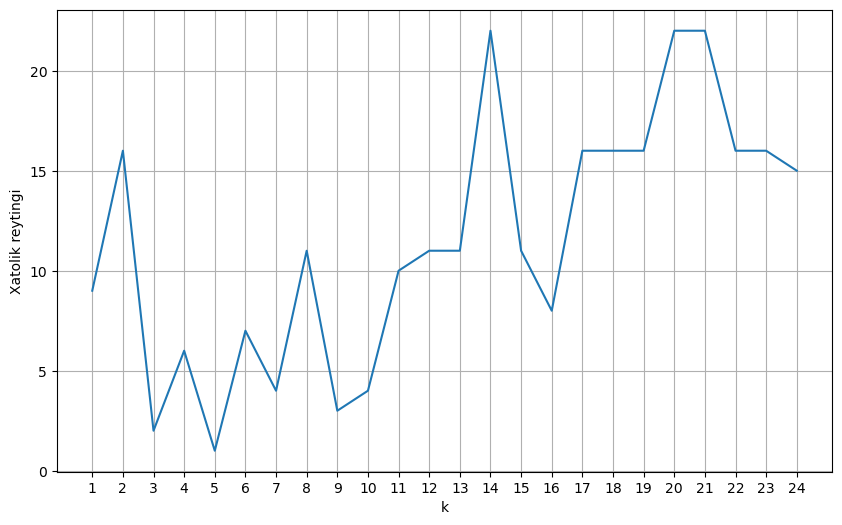

In [24]:
plt.figure(figsize=(10,6))
plt.plot(param_grid['n_neighbors'], knn_gscv.cv_results_['rank_test_score'])
plt.xticks(param_grid['n_neighbors'])
plt.xlabel("k")
plt.ylabel("Xatolik reytingi")
plt.grid()
plt.show()

The End